In [1]:
#imports

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models

In [9]:
# Define the model
model = models.Sequential()

model.add(layers.Conv2D(1, (9, 9), padding='valid', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(1, (7, 7), padding='valid'))
model.add(layers.Conv2D(1, (5, 5), padding='valid'))
model.add(layers.Conv2D(1, (3, 3), padding='valid'))


model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))  
model.add(layers.Dense(4, activation='relu'))  
model.add(layers.Dense(1, activation='sigmoid'))  

model.compile(
    optimizer='adam',               
    loss='binary_crossentropy',    
    metrics=['accuracy']           
)

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 20, 20, 1)      │            82 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 14, 14, 1)      │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 10, 10, 1)      │            26 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 8, 8, 1)        │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281 (5.00 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
def save_model_parameters(layer_num, layer):
    save_dir = "InitWeightsSeriesConverge"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    file_path = os.path.join(save_dir, f"layer_number_{layer_num}.npz")
    
    weights = layer.get_weights()  
    if weights:  
        np.savez(file_path, *weights)
        print(f"Saved parameters for layer {layer_num} to {file_path}")
    else:
        print(f"Layer {layer_num} has no weights to save.")

In [11]:
for i, layer in enumerate(model.layers):
    save_model_parameters(i, layer)

Saved parameters for layer 0 to InitWeightsSeriesConverge\layer_number_0.npz
Saved parameters for layer 1 to InitWeightsSeriesConverge\layer_number_1.npz
Saved parameters for layer 2 to InitWeightsSeriesConverge\layer_number_2.npz
Saved parameters for layer 3 to InitWeightsSeriesConverge\layer_number_3.npz
Layer 4 has no weights to save.
Saved parameters for layer 5 to InitWeightsSeriesConverge\layer_number_5.npz
Saved parameters for layer 6 to InitWeightsSeriesConverge\layer_number_6.npz
Saved parameters for layer 7 to InitWeightsSeriesConverge\layer_number_7.npz


In [12]:
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if weights:
        print(f"Layer {i} ")
    else:
        print(f"Layer {i} has no weights.")

Layer 0 
Layer 1 
Layer 2 
Layer 3 
Layer 4 has no weights.
Layer 5 
Layer 6 
Layer 7 


[[[[-0.15087026]]

  [[-0.02286145]]

  [[ 0.09694068]]

  [[ 0.07614695]]

  [[-0.08257943]]

  [[-0.17918535]]

  [[ 0.08180614]]

  [[-0.16655555]]

  [[ 0.15533744]]]


 [[[-0.12868696]]

  [[ 0.08508934]]

  [[ 0.14159782]]

  [[ 0.07099448]]

  [[ 0.17638634]]

  [[ 0.03967915]]

  [[-0.04302558]]

  [[ 0.01207934]]

  [[ 0.15536149]]]


 [[[ 0.14911525]]

  [[ 0.1562676 ]]

  [[-0.11175814]]

  [[-0.02481206]]

  [[-0.01366861]]

  [[ 0.07868405]]

  [[-0.1031232 ]]

  [[-0.13092807]]

  [[-0.10189067]]]


 [[[ 0.02524675]]

  [[-0.03817068]]

  [[ 0.12839167]]

  [[ 0.14595367]]

  [[-0.17204502]]

  [[ 0.05873327]]

  [[ 0.06815107]]

  [[ 0.19244824]]

  [[-0.08927463]]]


 [[[ 0.11367689]]

  [[ 0.06579246]]

  [[-0.0311469 ]]

  [[-0.15549286]]

  [[ 0.05816422]]

  [[ 0.12980919]]

  [[ 0.04752967]]

  [[-0.0152003 ]]

  [[ 0.0143365 ]]]


 [[[ 0.13430087]]

  [[-0.03023587]]

  [[ 0.0489711 ]]

  [[ 0.02571569]]

  [[-0.1737274 ]]

  [[ 0.02111471]]

  [[-0.1788566 ]]

  

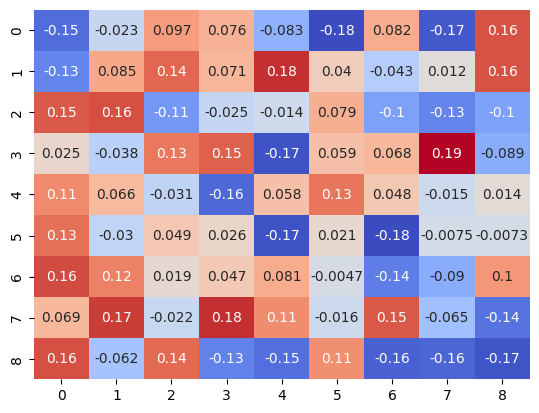

In [13]:
conv1_weights = model.layers[0].get_weights()[0]  
filter_index = 0  
channel_index = 0  
kernel_weights = conv1_weights[:, :, channel_index, filter_index]
print(conv1_weights)
print("First Conv2D Layer Kernel (Filter 0, Channel 0):")
sns.heatmap(kernel_weights, annot=True, cmap="coolwarm", cbar=False)
plt.show()

[[[[ 0.23972516]]

  [[-0.04452525]]

  [[ 0.02039422]]

  [[ 0.17841356]]

  [[-0.24509993]]

  [[-0.0219274 ]]

  [[-0.18262702]]]


 [[[ 0.03183185]]

  [[-0.21142101]]

  [[ 0.22246508]]

  [[-0.02844591]]

  [[ 0.20679505]]

  [[-0.07078977]]

  [[-0.1601113 ]]]


 [[[ 0.19060646]]

  [[ 0.1992334 ]]

  [[-0.01955616]]

  [[-0.18017656]]

  [[-0.01343749]]

  [[-0.20713219]]

  [[-0.23221685]]]


 [[[-0.23921405]]

  [[-0.2054156 ]]

  [[ 0.12031387]]

  [[ 0.19049124]]

  [[-0.00222753]]

  [[-0.10963131]]

  [[ 0.1735834 ]]]


 [[[ 0.02847458]]

  [[-0.18900898]]

  [[-0.1590585 ]]

  [[ 0.09542586]]

  [[ 0.09617572]]

  [[-0.11648002]]

  [[ 0.03121974]]]


 [[[-0.13083923]]

  [[-0.15236676]]

  [[ 0.10848238]]

  [[ 0.01815461]]

  [[ 0.202197  ]]

  [[-0.23082721]]

  [[-0.0493643 ]]]


 [[[ 0.2161472 ]]

  [[-0.15109587]]

  [[-0.18126658]]

  [[ 0.17643018]]

  [[ 0.08221595]]

  [[ 0.02630724]]

  [[ 0.06502821]]]]
First Conv2D Layer Kernel (Filter 0, Channel 0):


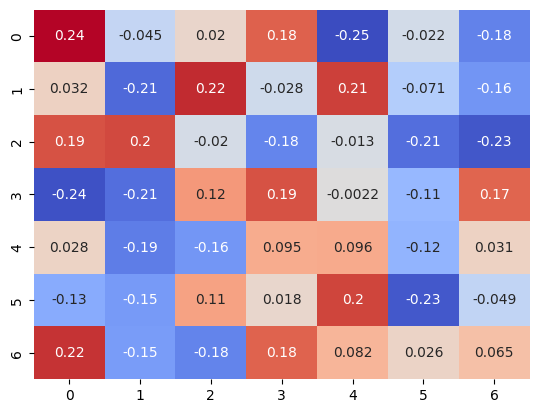

In [14]:
conv1_weights = model.layers[1].get_weights()[0]  
filter_index = 0  
channel_index = 0  
kernel_weights = conv1_weights[:, :, channel_index, filter_index]
print(conv1_weights)
print("First Conv2D Layer Kernel (Filter 0, Channel 0):")
sns.heatmap(kernel_weights, annot=True, cmap="coolwarm", cbar=False)
plt.show()

[[[[-0.19491501]]

  [[ 0.25791496]]

  [[-0.29552722]]

  [[ 0.00138861]]

  [[ 0.33151942]]]


 [[[ 0.18099356]]

  [[-0.26929802]]

  [[-0.08134547]]

  [[-0.24312134]]

  [[ 0.1402084 ]]]


 [[[ 0.13733912]]

  [[-0.34507623]]

  [[ 0.33137423]]

  [[ 0.33911532]]

  [[ 0.03273678]]]


 [[[-0.09138009]]

  [[ 0.17036974]]

  [[-0.00771818]]

  [[ 0.05293372]]

  [[-0.3165317 ]]]


 [[[-0.18308043]]

  [[-0.22480273]]

  [[-0.124119  ]]

  [[ 0.04254919]]

  [[ 0.16537315]]]]
First Conv2D Layer Kernel (Filter 0, Channel 0):


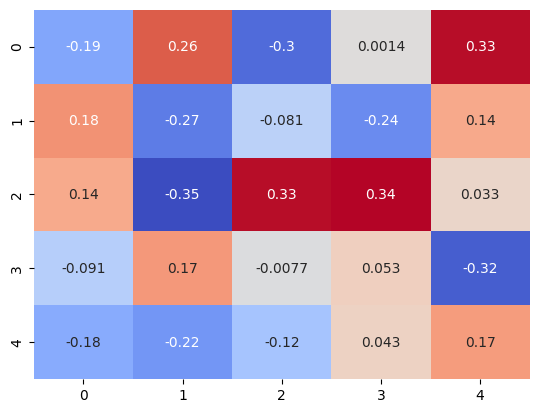

In [15]:
conv1_weights = model.layers[2].get_weights()[0]  
filter_index = 0  
channel_index = 0  
kernel_weights = conv1_weights[:, :, channel_index, filter_index]
print(conv1_weights)
print("First Conv2D Layer Kernel (Filter 0, Channel 0):")
sns.heatmap(kernel_weights, annot=True, cmap="coolwarm", cbar=False)
plt.show()

[[[[-0.00724113]]

  [[-0.21642679]]

  [[ 0.01657718]]]


 [[[-0.01733547]]

  [[ 0.09443593]]

  [[ 0.3909065 ]]]


 [[[-0.3765514 ]]

  [[ 0.18158251]]

  [[ 0.17965496]]]]
First Conv2D Layer Kernel (Filter 0, Channel 0):


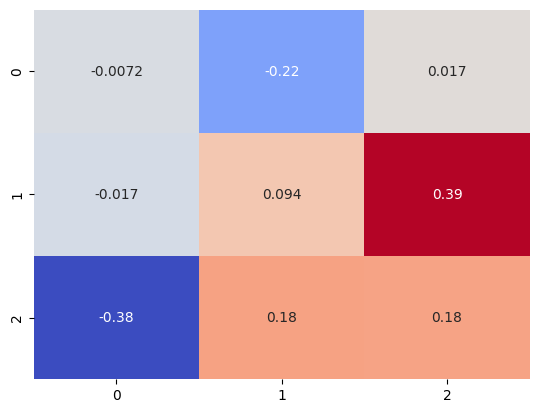

In [16]:
conv1_weights = model.layers[3].get_weights()[0]  
filter_index = 0  
channel_index = 0  
kernel_weights = conv1_weights[:, :, channel_index, filter_index]
print(conv1_weights)
print("First Conv2D Layer Kernel (Filter 0, Channel 0):")
sns.heatmap(kernel_weights, annot=True, cmap="coolwarm", cbar=False)
plt.show()

In [17]:
model.layers[5].get_weights()[0]

array([[ 0.14157158, -0.25510746, -0.11875056, ..., -0.13791025,
         0.1577757 ,  0.22971302],
       [ 0.16968507,  0.02170405,  0.1170328 , ..., -0.16176155,
        -0.26925567,  0.16360086],
       [-0.2001002 , -0.15881085,  0.17493337, ..., -0.15255521,
         0.06367812,  0.23146826],
       ...,
       [ 0.07045344,  0.15247482,  0.16352564, ...,  0.1235745 ,
        -0.20179574, -0.0599319 ],
       [ 0.17304167,  0.21538392, -0.0689991 , ...,  0.12265301,
        -0.10460116,  0.20974654],
       [ 0.24091542, -0.02685514,  0.09957439, ...,  0.2719789 ,
         0.1682986 ,  0.02599046]], dtype=float32)

In [18]:
model.layers[6].get_weights()[0]

array([[ 0.47690046, -0.18547633, -0.27772588, -0.44720775],
       [-0.31058204, -0.3190258 ,  0.4967246 , -0.5373076 ],
       [-0.05382165, -0.24288979, -0.5112715 , -0.35768119],
       [ 0.03651595, -0.40598658, -0.4258676 , -0.04003674],
       [-0.27702543, -0.21664879, -0.5063226 ,  0.04464936],
       [-0.32795352, -0.14043418, -0.26601496,  0.22241569],
       [-0.5084473 , -0.41476348,  0.00551629,  0.2850082 ],
       [ 0.43305862,  0.47974145, -0.04969522, -0.00663018],
       [ 0.20183891, -0.53118   ,  0.44106585, -0.506489  ],
       [-0.06606147, -0.48589423, -0.08712441, -0.09792268],
       [ 0.00761127, -0.07666907, -0.11144498, -0.5440433 ],
       [ 0.34408104, -0.22911963,  0.34011823,  0.43297243],
       [ 0.3801009 ,  0.45771122, -0.04026616, -0.39865816],
       [-0.09325352, -0.12404522, -0.4621583 , -0.06190017],
       [-0.30606592, -0.07797274, -0.20419705, -0.3047166 ],
       [ 0.0873639 ,  0.36377794,  0.10813069,  0.0253427 ]],
      dtype=float32)

In [19]:
model.layers[7].get_weights()[0]

array([[ 0.7231482 ],
       [-0.81789035],
       [-0.07746065],
       [-0.6027653 ]], dtype=float32)